<a href="https://colab.research.google.com/github/IPMSand/NLP-Module/blob/main/Lecture27_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POS Tag

In [2]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Download NLTK resources
nltk.download('punkt') # Ensure 'punkt' is downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng') # Download the specific eng tagger
nltk.download('punkt_tab') # cuz' there was a error saying to download this

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [9]:
text = "I love Python programming and I enjoy coding in Python"

tokens = word_tokenize(text)
tags = pos_tag(tokens)
print(tags)

# Extracts only tags
pos_counts ={}
for word,tag in tags:
  if tag in pos_counts.keys():
    pos_counts[tag] += 1
  else:
    pos_counts[tag] = 1

print(pos_counts)

[('I', 'PRP'), ('love', 'VBP'), ('Python', 'NNP'), ('programming', 'NN'), ('and', 'CC'), ('I', 'PRP'), ('enjoy', 'VBP'), ('coding', 'VBG'), ('in', 'IN'), ('Python', 'NNP')]
{'PRP': 2, 'VBP': 2, 'NNP': 2, 'NN': 1, 'CC': 1, 'VBG': 1, 'IN': 1}


## Visualize POS

### POS Tag Bar-Chart

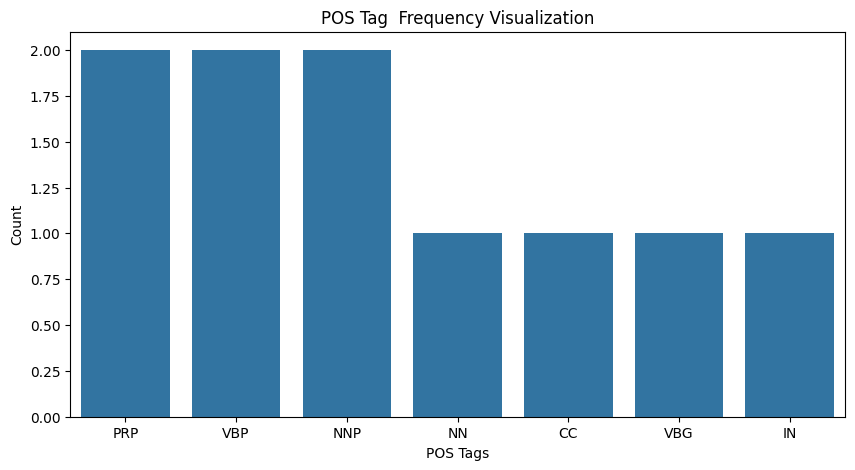

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.xlabel('POS Tags')
plt.ylabel('Count')
plt.title('POS Tag  Frequency Visualization')
plt.show()

### Pie-chart

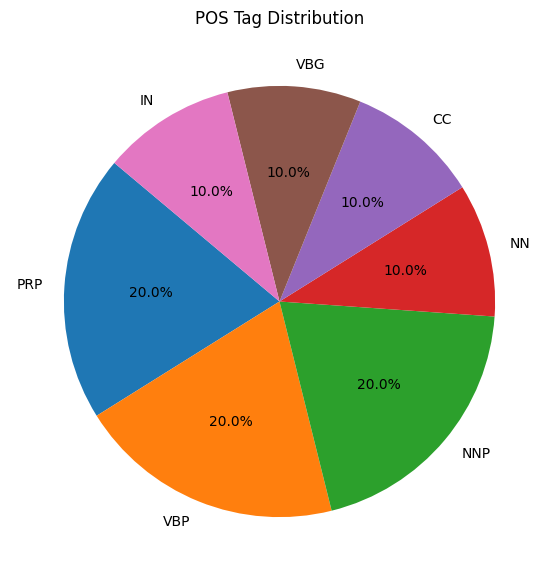

In [12]:
plt.figure(figsize=(7,7))
plt.pie(pos_counts.values(), labels=pos_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('POS Tag Distribution')
plt.show()

# Activity - Sentiment Analysis

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [16]:
#1- Load Dataset (example: dataset.cvs with colums 'text' and 'label')
df = pd.read_csv("/content/combined_sentiment_data.csv")

In [17]:
# Check first rows
print(df.head())

                                            sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive


In [18]:
# 2.Split Into train/test
x_train, x_test, y_train, y_test = train_test_split(df['sentence'], df['sentiment'], test_size=0.2, random_state=42)


In [21]:
# 3.Build Pipeline (IF-IDF + Naive Bayes)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [22]:
# 4. Train Model
model.fit(x_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [23]:
# 5. Predict
y_pred = model.predict(x_test)

In [24]:
# 6. Evaluate
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83       334
    positive       0.82      0.83      0.83       328

    accuracy                           0.83       662
   macro avg       0.83      0.83      0.83       662
weighted avg       0.83      0.83      0.83       662



In [44]:
from os import pread
# Try New Examples
new_text = [
    "The team lost happily.",
    "Reseachers has discovered water on Mars",
]

predictions = model.predict(new_text)
print(predictions)


['negative' 'positive' 'positive' 'negative']
